In [1]:
import pandas as pd
import requests
import openpyxl

### Part 1. Vaccinations and cases in Russia per region

In [50]:
# READ IN the vsccinations data from html
df_vac = pd.read_html('https://gogov.ru/articles/covid-v-stats')

In [51]:
#FIND the right table
df_vac[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   регион                       85 non-null     object 
 1   привито, чел.                85 non-null     object 
 2   % от насе-ления              85 non-null     float64
 3   средний темп, чел./день      85 non-null     object 
 4   средний темп к нас., %       85 non-null     float64
 5   дней до вакц. 50% нас.       85 non-null     int64  
 6   привито двумя комп., чел.    85 non-null     object 
 7   обнов-лено                   85 non-null     float64
 8   2 комп./1 комп.              85 non-null     object 
 9   Измене-ние средн. темпа ***  85 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.8+ KB


In [52]:
#REWRITE as df_regions
dr_vac = df_vac[0]

In [53]:
#TRANSLATE the column names
dr_vac.columns=['region', 'total_vac', '%_of_pop', 'pace_p_p_d', 'pace_%_pop', 'days_50%', 'both_people', 'upd', '2/1', 'pace_chng'] 

In [54]:
#SORT 5 regions with the HIGHEST % of vaccinated population 
dr_vac.sort_values(by='%_of_pop', ascending=False).head(5)

,region,total_vac,%_of_pop,pace_p_p_d,pace_%_pop,days_50%,both_people,upd,2/1,pace_chng
83,Чукотский АО,17 000,34.32,225,0.45,35,13 600,6.07,80%,106%
10,Белгородская обл.,528 698,34.30,7 577,0.49,32,357 932,9.07,68%,-6%
1,Московская обл.,2 000 000,25.95,62 633,0.81,30,1 100 000,8.07,55%,59%
44,Мордовия,201 738,25.90,2 825,0.36,66,149 569,8.07,74%,12%
84,Ненецкий АО,11 403,25.69,111,0.25,97,9 562,8.07,84%,13%


In [55]:
#SORT 5 regions with the LOWEST % of vaccinated population 
dr_vac.sort_values(by='%_of_pop', ascending=False).tail(5)

,region,total_vac,%_of_pop,pace_p_p_d,pace_%_pop,days_50%,both_people,upd,2/1,pace_chng
59,Владимирская обл.,149 000,11.10,2 165,0.16,241,112 000,6.07,75%,30%
74,Северная Осетия,76 203,10.99,1 458,0.21,185,46 859,7.07,61%,14%
77,Адыгея,50 717,10.95,1 197,0.26,151,32 000,2.07,63%,40%
72,Кабардино-Балкария,78 930,9.08,1 562,0.18,228,43 284,7.07,55%,-19%
50,Дагестан,177 807,5.67,3 722,0.12,373,94 703,9.07,53%,51%


In [56]:
# READ IN the data on cases using read_html 
df_cases = pd.read_html('https://gogov.ru/articles/covid-19')

In [9]:
#FIND the right table
df_cases[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Регион         85 non-null     object 
 1   Всего случаев  85 non-null     object 
 2   за сутки       85 non-null     object 
 3   Коэф. распр.   85 non-null     float64
 4   Умерло         85 non-null     object 
 5   за сутки.1     74 non-null     float64
 6   Смерт-ность    85 non-null     object 
 7   Выздор.        85 non-null     object 
dtypes: float64(2), object(6)
memory usage: 5.4+ KB


In [57]:
#REWRITE as df_regions
df_cases = df_cases[0]

In [58]:
#TRANSLATE the column names
df_cases.columns=['region', 'total_cases', 'new_cases', 'distr', 'total_dead', 'new_dead', 'mortality', 'recov'] 

In [12]:
#SORT 5 regions with the HIGHEST % of mortality 
df_cases.sort_values(by='mortality', ascending=False).head(10)

,region,total_cases,new_cases,distr,total_dead,new_dead,mortality,recov
21,Краснодарский край,53 534,+212,1.04,3 595,23.0,6.7%,45 825
61,Чувашия,27 766,+62,1.00,1 593,6.0,5.7%,25 374
38,Тульская обл.,43 997,+151,0.99,2 271,9.0,5.2%,39 767
7,Красноярский край,80 186,+385,1.24,4 034,11.0,5%,71 165
4,Ростовская обл.,101 467,+296,1.14,4 756,18.0,4.7%,91 239
19,Алтайский край,56 006,+219,1.07,2 540,14.0,4.5%,47 439
14,Пермский край,63 785,+354,1.20,2 785,11.0,4.4%,56 780
32,Новосибирская обл.,48 244,+189,1.04,2 127,8.0,4.4%,42 400
73,Севастополь,17 561,+115,1.00,768,4.0,4.4%,15 282
53,Дагестан,37 167,+183,1.06,1 569,3.0,4.2%,33 536


In [59]:
df_cases.sort_values(by='mortality', ascending=False).tail(10)

,region,total_cases,new_cases,distr,total_dead,new_dead,mortality,recov
46,Псковская обл.,40 844,+147,1.07,497,3.0,1.2%,34 032
44,Ямало-Ненецкий АО,40 935,+105,1.15,438,2.0,1.1%,39 169
49,Калужская обл.,38 271,+108,1.12,396,NaN,1%,36 430
71,Карачаево-Черкесия,21 188,+44,1.40,202,3.0,1%,20 424
84,Чукотский АО,896,+16,1.41,8,NaN,0.9%,765
18,Хабаровский край,58 233,+323,1.05,522,1.0,0.9%,53 905
83,Ненецкий АО,1 294,+14,1.18,10,NaN,0.8%,1 175
34,Кировская обл.,47 763,+110,0.96,400,1.0,0.8%,45 116
59,Новгородская обл.,33 090,+128,1.33,187,NaN,0.6%,31 963
64,Сахалинская обл.,25 265,+86,1.04,77,4.0,0.3%,24 006


### Part 2. Global data on vaccinations from Our World in Data

In [14]:
#Sources:
#Our world in data
#https://ourworldindata.org/covid-vaccinations
#https://github.com/owid/covid-19-data/tree/master/public/data

In [60]:
df = pd.read_csv('owid-covid-data.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100920 entries, 0 to 100919
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               100920 non-null  object 
 1   continent                              96197 non-null   object 
 2   location                               100920 non-null  object 
 3   date                                   100920 non-null  object 
 4   total_cases                            97187 non-null   float64
 5   new_cases                              97184 non-null   float64
 6   new_cases_smoothed                     96174 non-null   float64
 7   total_deaths                           87013 non-null   float64
 8   new_deaths                             87169 non-null   float64
 9   new_deaths_smoothed                    96174 non-null   float64
 10  total_cases_per_million                96670 non-null   

In [62]:
pd.set_option('display.max_columns', None)

In [18]:
#df = df.dropna(subset=['people_fully_vaccinated_per_hundred'])

In [19]:
#df[df['date'] == '2021-07-07'].sort_values(by='people_fully_vaccinated_per_hundred', ascending=False).head(10)['location']

17509          Cayman Islands
41733                 Iceland
95113    United Arab Emirates
45440                  Israel
7790                  Bahrain
4756                    Aruba
44936             Isle of Man
60908                Mongolia
96652                 Uruguay
41236                 Hungary
Name: location, dtype: object

In [21]:
#FILTER the data for 1 day
df_day = df[df['date'] == '2021-07-07']

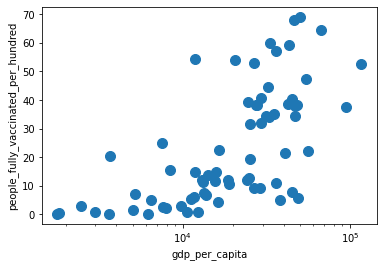

In [22]:
#CALCULATE the correlation btw GDP and total vaccinations
df_day.plot.scatter(x = 'gdp_per_capita', y = 'people_fully_vaccinated_per_hundred', s = 100, logx=True)

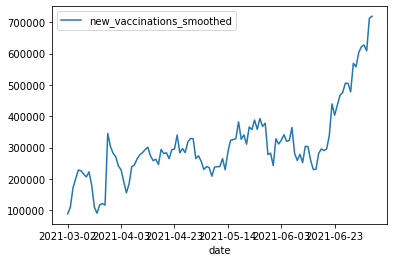

In [45]:
#PLOT the vaccination rate for Russia 
df[(df['location']=='Russia')].plot.line(x='date', y='new_vaccinations_smoothed')

In [46]:
#FILTER data for Russia 
df_ru = df[(df['location']=='Russia')]

In [48]:
#SAVE as csv
df_ru.to_csv('russia.csv')

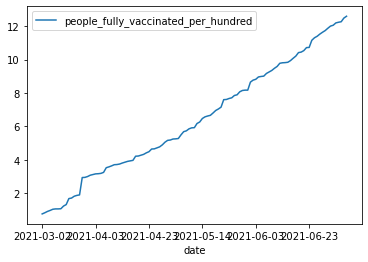

In [24]:
#df[(df['location']=='Russia')].plot.line(x='date', y='people_fully_vaccinated_per_hundred')

In [63]:
#df[df['location']=='Israel'].plot.line(x='date', y='new_vaccinations_smoothed_per_million')

In [65]:
#df[df['location']=='Israel'].plot.line(x='date', y='people_fully_vaccinated_per_hundred')

### Part 3. Merge with income classification from World Bank

In [27]:
#Source:
#https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups#:~:text=%EF%BB%BF%EF%BB%BF%20For%20the%20current,those%20with%20a%20GNI%20per

In [66]:
#READ in the data with WB income classification
income=pd.read_excel("wb_income.xlsx")

In [83]:
#income.info()

In [68]:
#MERGE with data from OWID
df_all = df.merge(income.add_prefix("wb"), left_on='iso_code', right_on='wbCode')

In [69]:
df_all = df_all.rename(columns={'wbIncome group': 'wbIncome_group'})

In [70]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94203 entries, 0 to 94202
Data columns (total 66 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               94203 non-null  object 
 1   continent                              94203 non-null  object 
 2   location                               94203 non-null  object 
 3   date                                   94203 non-null  object 
 4   total_cases                            91499 non-null  float64
 5   new_cases                              91491 non-null  float64
 6   new_cases_smoothed                     90544 non-null  float64
 7   total_deaths                           81988 non-null  float64
 8   new_deaths                             81987 non-null  float64
 9   new_deaths_smoothed                    90544 non-null  float64
 10  total_cases_per_million                91499 non-null  float64
 11  ne

In [71]:
#FILTER out the data for 6 July
df_1day = df_all[df_all['date'] == '2021-07-06']

In [72]:
df_1day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 498 to 94201
Data columns (total 66 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               198 non-null    object 
 1   continent                              198 non-null    object 
 2   location                               198 non-null    object 
 3   date                                   198 non-null    object 
 4   total_cases                            190 non-null    float64
 5   new_cases                              190 non-null    float64
 6   new_cases_smoothed                     190 non-null    float64
 7   total_deaths                           184 non-null    float64
 8   new_deaths                             184 non-null    float64
 9   new_deaths_smoothed                    190 non-null    float64
 10  total_cases_per_million                190 non-null    float64
 11  ne

In [73]:
df_1day['wbIncome_group'].unique()

array(['Low income', 'Upper middle income', 'Lower middle income',
       'High income', nan], dtype=object)

In [74]:
#RENAME the cols for draft viz purposes
df_1day = df_1day.replace(['High income', 'Upper middle income', 'Lower middle income', 'Low income'], ['1_High income','2_Upper middle income', '3_Lower middle income','4_Low income'])

In [75]:
#OUTPUT as csv
df_1day.to_csv('6July.csv')

In [76]:
#FILTER the data for 15 June, the day before the reinforcements in Russia started
df_1506 = df_all[df_all['date'] == '2021-06-15']

In [78]:
df_1506['wbIncome_group'].unique()

array(['Low income', 'Upper middle income', 'Lower middle income',
       'High income', nan], dtype=object)

In [79]:
#RENAME the cols
df_1506 = df_1506.replace(['High income', 'Upper middle income', 'Lower middle income', 'Low income'], ['1_High income','2_Upper middle income', '3_Lower middle income','4_Low income'])

In [81]:
#df_1506.info()

In [82]:
#OUTPUT as csv
df_1506.to_csv('15June.csv')